# PRAKTIKUM 1

### Langkah 1 - Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Langkah 2 - Load Data dan Visualisasi

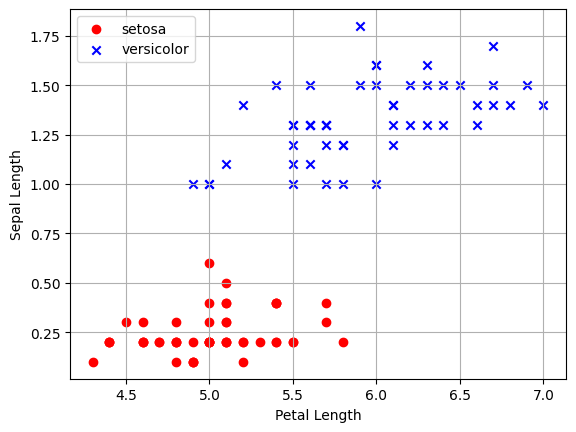

In [11]:
df = pd.read_csv('/content/sample_data/iris.csv',
                header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Langkah 3 - Membuat Kelas Perceptron

In [12]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Langkah 4 - Pilih Data dan Encoding Label

In [13]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

### Langkah 5 - Fitting Model

In [14]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

### Langkah 6 - Visualisasi Nilai Error Per Epoch

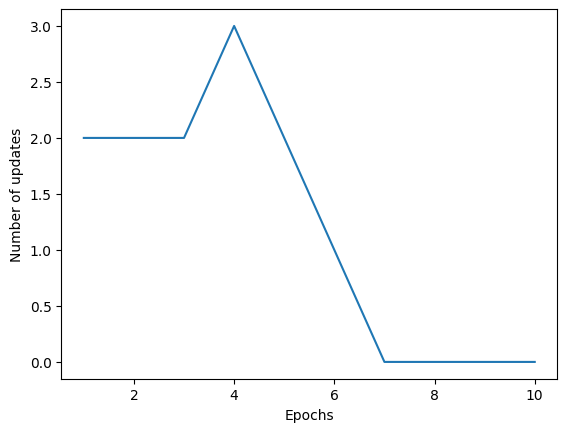

In [15]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Langkah 7 - Visualiasasi Decision Boundary

<ipython-input-18-5fa13d182581>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


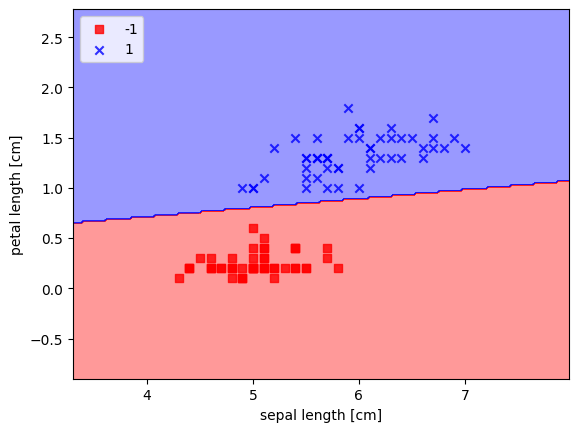

In [18]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# PRAKTIKUM 2

### Langkah 1 - Import Library

In [19]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

### Langkah 2 - Pilih Label dan Split Data

In [20]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

### Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [21]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



# PRAKTIKUM 3

### Langkah 1 - Import Library

In [22]:
from sklearn.neural_network import MLPClassifier

### Langkah 2 - Buat Data

In [23]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

### Langkah 3 - Fit Model

In [24]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

### Langkah 4 - Prediksi

In [25]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# PRAKTIKUM 4

## Pra Pengolahan Data

### Langkah 1 - Import Library

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Langkah 2 - Load Data

In [28]:
dataset = pd.read_csv('/content/sample_data/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

### Langkah 3 - Encoding Data Kategorikal

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

### Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [31]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Langkah 5 - Split Data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Langkah 6 - Scaling Fitur

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Membuat Model ANN

### Langkah 1 - Inisiasi Model ANN

In [34]:
ann = tf.keras.models.Sequential()

### Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [35]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 3 - Membuat Hidden Layer Kedua

In [36]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 4 - Membuat Output Layer

In [37]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training Model

### Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [38]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Langkah 2 - Fitting Model

In [39]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.5523 - accuracy: 0.7740
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4627 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4467 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4377 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4317 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.7961
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4159 - accuracy: 0.8159
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4104 - accuracy: 0.8230
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4033 - accura

## Membuat Prediksi

Diberikan informasi sebagai berikut,

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

## Modelkan Data Baru dan Buat Prediksi

In [40]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 134ms/step
[[False]]


## Prediksi Dengan Data Testing

In [41]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Cek Akurasi dan Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1528   67]
 [ 212  193]]


0.8605

# TUGAS

#### Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

#### Anda diperbolehkan melakukan eksplorasi terhadap,
##### a.Metode pra pengolahan
##### b.Pemilihan fitur
##### c.Arsitektur ANN
##### d.Fungsi Aktiviasi

#### ANN diimplementasikan dengan menggunakan tensorflow.

**Menyiapkan Data MNIST dan Melakukan Splitting**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
import warnings
warnings.filterwarnings('ignore')
#cuda 12.1 not recognized by tf :(
%matplotlib inline
# print(tensorflow.__version__)

In [50]:
# muat data MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


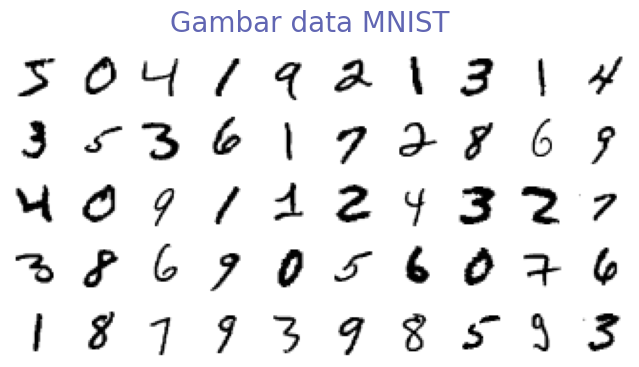

In [51]:
# Menampilkan gambar dari data MNIST

fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Gambar data MNIST", size=20, color="#6166B3")

plt.show()

In [52]:
# print data dan nilai
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255


In [53]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


**Membuat Pemodelan ANN**

In [54]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

In [55]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)

In [56]:
# mengonfigurasi bagaimana model neural network (NN) Anda akan melakukan pelatihan
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
# pelatihan model neural network (NN) pada data pelatihan
history = nn_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4967 - accuracy: 0.8506
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3061 - accuracy: 0.9097
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2689 - accuracy: 0.9190
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2467 - accuracy: 0.9259
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2303 - accuracy: 0.9299
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2220 - accuracy: 0.9316
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2127 - accuracy: 0.9347
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2030 - accuracy: 0.9371
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2020 - accuracy: 0.9378
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - 

Text(0, 0.5, 'Acc')

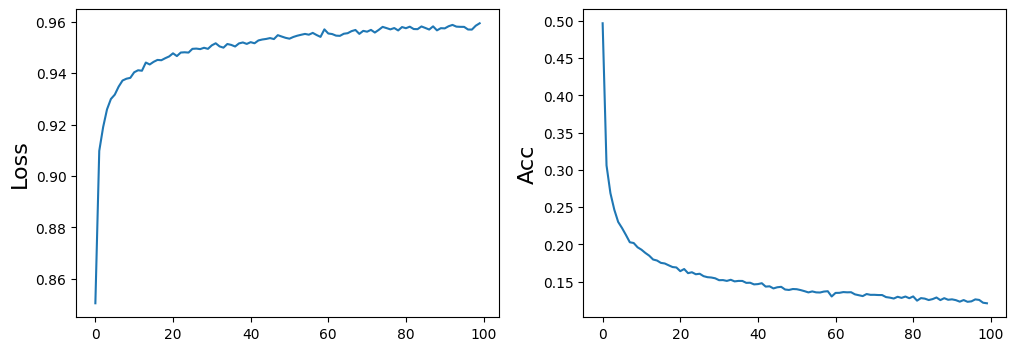

In [59]:
# menggambar dua plot yang menggambarkan perkembangan model Anda selama pelatihan (epoch)
# dalam hal akurasi dan kerugian.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(history.history['accuracy'])
ax[0].set_ylabel('Loss', fontsize=16)

ax[1].plot(history.history['loss'])
ax[1].set_ylabel('Acc', fontsize=16)

In [60]:
# menghitung akurasi model pada data pengujian setelah model dilatih
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 [==============================] - 1s 2ms/step


0.9648

In [63]:
# menghitung dan menghasilkan matriks kebingungan (confusion matrix) sebagai
# bagian dari evaluasi hasil model klasifikasi
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 964,    0,    4,    0,    1,    3,    3,    3,    1,    1],
       [   0, 1116,    6,    3,    0,    1,    2,    1,    6,    0],
       [   4,    2,  999,    3,    3,    2,    3,    8,    8,    0],
       [   1,    0,    8,  978,    0,    8,    0,    6,    5,    4],
       [   1,    0,    2,    2,  954,    0,    8,    4,    2,    9],
       [   3,    0,    1,   10,    3,  855,    4,    3,    9,    4],
       [  13,    3,    3,    1,    7,    8,  920,    0,    3,    0],
       [   2,    7,   13,   12,    1,    0,    0,  986,    1,    6],
       [  10,    2,    4,    9,    4,    9,    5,    6,  923,    2],
       [   2,    3,    0,    6,   14,   15,    2,    8,    6,  953]])

<Axes: >

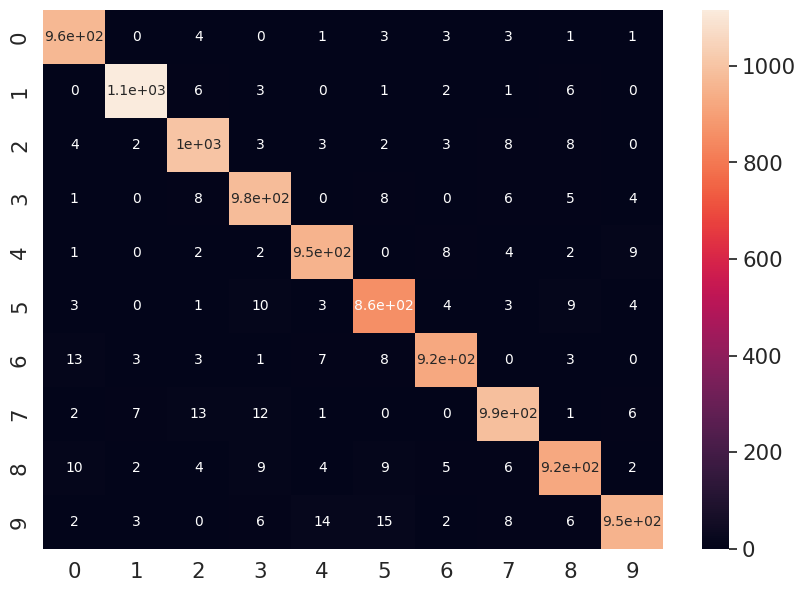

In [62]:
# menggambarkan matriks kebingungan (confusion matrix) dalam bentuk heatmap menggunakan library seaborn.
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size